In [1]:
import tensorflow as tf 
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
EPOCH = 50
IMAGE_SIZE = 224
CHANNELS = 3
BATCH_SIZE = 32 
INPUT_SHAPE = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = "../../../data/formatted/224_formatted", 
    seed = 123,
    shuffle=True, 
    image_size = (IMAGE_SIZE, IMAGE_SIZE), 
    batch_size = BATCH_SIZE
)

Found 912 files belonging to 2 classes.


In [4]:
class_names = dataset.class_names
class_names

['sctld_coral', 'unaffected_coral']

In [5]:
for image_batch, labels_batch in dataset.take(1):
    print(f"random batch shape: {image_batch.shape}")

random batch shape: (32, 224, 224, 3)


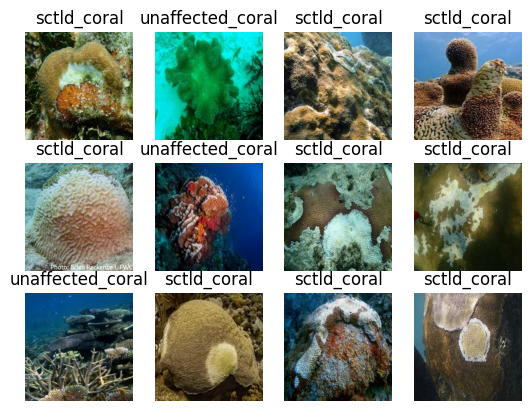

In [6]:
for image_batch, label_batch in dataset.take(1):
    for i in range(12): 
        ax = plt.subplot(3,4,i+1) 
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
      

In [7]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size=1000): 
    assert (train_split + test_split + val_split == 1)
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = dataset.skip(train_size).take(val_size)
    test_ds =  dataset.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [8]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [9]:
len(test_ds)

4

In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])

In [12]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"), 
    layers.RandomRotation(0.1)
])

# train_ds = train_ds.map(
#     lambda x, y: (data_augmentation(x, training=True), y)
# ).prefetch(buffer_size=tf.data.AUTOTUNE)

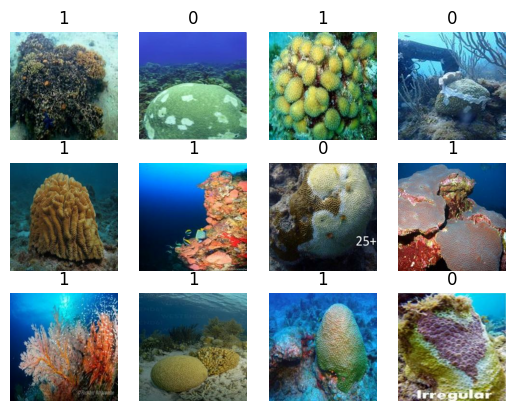

In [13]:
for image_batch, label_batch in dataset.take(1):
    for i in range(12): 
        ax = plt.subplot(3,4,i+1) 
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(label_batch[i].numpy())
        plt.axis("off")

In [14]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

# Model definition
model = models.Sequential([
    # Assuming resize_and_rescale is defined elsewhere
    resize_and_rescale,
    
    # First Conv2D layer
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    
    # Second Conv2D layer
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third Conv2D layer
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Fourth Conv2D layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Fifth Conv2D layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Sixth Conv2D layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the output
    layers.Flatten(),
    
    # Dense layer for learning complex patterns
    layers.Dense(64, activation='relu'),
    
    # Output layer with softmax activation for classification
    layers.Dense(n_classes, activation='softmax'),
])


model.build()



C:\Users\qianyu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
from tensorflow.keras.metrics import *
metrics = ['accuracy']
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=metrics 
)

from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Metric to monitor
    patience=5,              # Number of epochs to wait for improvement before stopping
    mode='max',              # Look for maximum value (for accuracy)
    restore_best_weights=True # Restore the weights of the best epoch
)


In [17]:
for image_batch, labels_batch in dataset.take(1): 
    print(image_batch.shape)
    print(labels_batch)

(32, 224, 224, 3)
tf.Tensor([1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1], shape=(32,), dtype=int32)


In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath='best_model_weights.weights.h5', 
    save_weights_only=True,          
    monitor='val_loss',            
    mode='min',                       
    save_best_only=True               
)

In [19]:
history= model.fit(
    train_ds,
    epochs = EPOCH,
    batch_size = BATCH_SIZE, 
    verbose = 1, 
    validation_data = val_ds,
   callbacks=[checkpoint_callback]
)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 261ms/step - accuracy: 0.4773 - loss: 0.6989 - val_accuracy: 0.5000 - val_loss: 0.6893
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 259ms/step - accuracy: 0.5598 - loss: 0.6835 - val_accuracy: 0.6250 - val_loss: 0.6125
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 265ms/step - accuracy: 0.6737 - loss: 0.6155 - val_accuracy: 0.5469 - val_loss: 0.6476
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.6000 - loss: 0.6269 - val_accuracy: 0.7656 - val_loss: 0.4860
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step - accuracy: 0.7464 - loss: 0.5170 - val_accuracy: 0.7656 - val_loss: 0.4565
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 271ms/step - accuracy: 0.7502 - loss: 0.5018 - val_accuracy: 0.5938 - val_loss: 0.7233
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 263ms/step - accuracy: 0.7178 - loss: 0.5609 - val_accuracy: 0.7500 - val_loss: 0.5141
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 263ms/step - accuracy: 0.7534 - loss: 0.4997 - val_accuracy: 0.

In [22]:
history.history.keys()
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

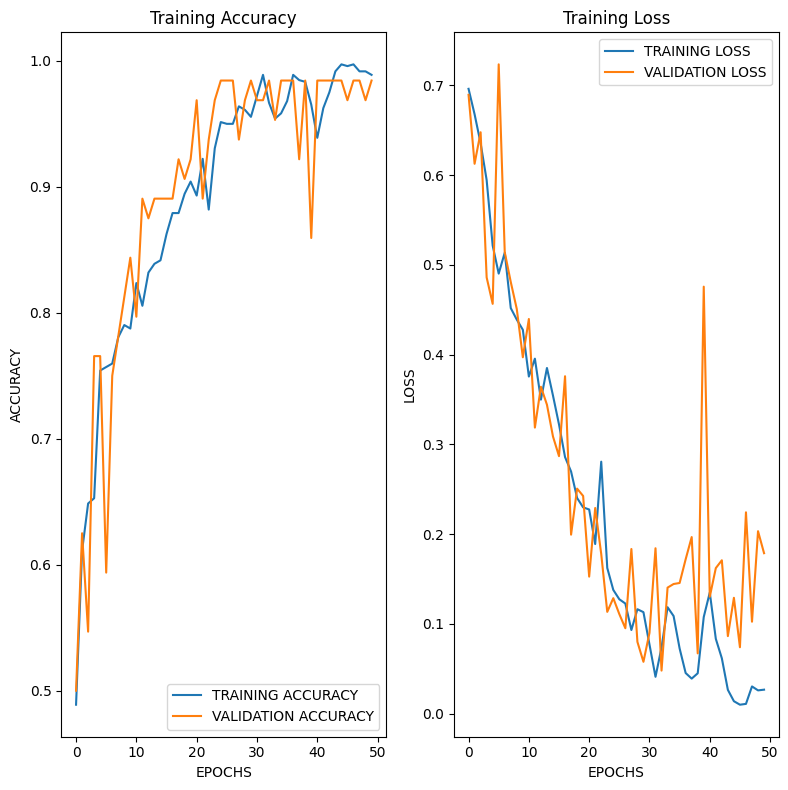

In [37]:
import matplotlib.pyplot as plt

# Assuming history is the variable that holds the training history

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting training and validation accuracy
plt.figure(figsize = (8, 8))

# Subplot for Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(50), accuracy, label ='TRAINING ACCURACY')
plt.plot(range(50), val_accuracy, label = 'VALIDATION ACCURACY')
plt.title("Training Accuracy")
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.legend()

# Subplot for Loss
plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label ='TRAINING LOSS')
plt.plot(range(50), val_loss, label = 'VALIDATION LOSS')
plt.title("Training Loss")
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.legend()

plt.tight_layout()  # To prevent overlap of subplots
plt.show()


In [24]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9610 - loss: 0.0855 
Test Loss: 0.06808346509933472
Test Accuracy: 0.9732142686843872


In [25]:
import numpy as np

y_true = []
y_pred = []

for batch in test_ds:  
    x_batch, y_batch = batch 
    y_true.extend(y_batch.numpy())  
    predictions = model.predict(x_batch)  
    y_pred.extend(predictions)
y_true = np.array(y_true)
y_pred = np.array(y_pred)

y_pred_binary = (y_pred > 0.5).astype(int) 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [26]:
import numpy as np

y_pred_binary_1d = np.argmax(y_pred_binary, axis=1)
print(f"y_true shape: {y_true.shape}")
print(f"y_pred_binary_1d shape: {y_pred_binary_1d.shape}")



y_true shape: (112,)
y_pred_binary_1d shape: (112,)


In [35]:
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report

f1 = f1_score(y_true, y_pred_binary_1d)
recall = recall_score(y_true, y_pred_binary_1d)
precision = precision_score(y_true, y_pred_binary_1d)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(classification_report(y_true, y_pred_binary_1d))


F1 Score: 0.9734513274336283
Recall: 0.9482758620689655
Precision: 1.0
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       1.00      0.95      0.97        58

    accuracy                           0.97       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.97      0.97       112



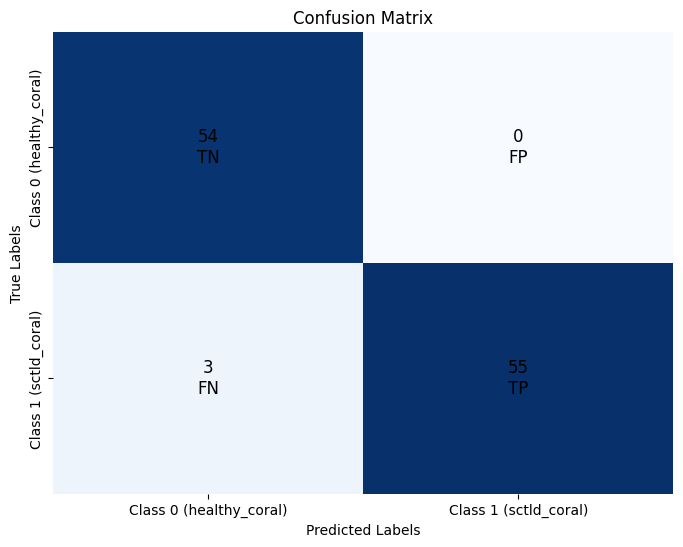

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred_binary_1d)
tn, fp, fn, tp = cm.ravel()

plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=False, fmt="d", cmap="Blues", cbar=False, 
                 xticklabels=["Class 0 (healthy_coral)", "Class 1 (sctld_coral)"], 
                 yticklabels=["Class 0 (healthy_coral)", "Class 1 (sctld_coral)"])
for i in range(2):
    for j in range(2):
        label = ""
        if i == 0 and j == 0:
            label = f"{cm[i, j]}\nTN"
        elif i == 0 and j == 1:
            label = f"{cm[i, j]}\nFP"
        elif i == 1 and j == 0:
            label = f"{cm[i, j]}\nFN"
        elif i == 1 and j == 1:
            label = f"{cm[i, j]}\nTP"
        ax.text(j + 0.5, i + 0.5, label, ha="center", va="center", fontsize=12, color="black")

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


⭐MODEL EVALUATION AND MERTICS

In [44]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9749 - loss: 0.0809
Test Loss: 0.06808346509933472
Test Accuracy: 0.9732142686843872


In [12]:
import numpy as np

y_true = []
y_pred = []

for batch in test_ds:  
    x_batch, y_batch = batch 
    y_true.extend(y_batch.numpy())  
    predictions = model.predict(x_batch)  
    y_pred.extend(predictions)
y_true = np.array(y_true)
y_pred = np.array(y_pred)

y_pred_binary = (y_pred > 0.5).astype(int) 



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


In [13]:
import numpy as np

y_pred_binary_1d = np.argmax(y_pred_binary, axis=1)
print(f"y_true shape: {y_true.shape}")
print(f"y_pred_binary_1d shape: {y_pred_binary_1d.shape}")


y_true shape: (112,)
y_pred_binary_1d shape: (112,)


In [19]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, classification_report

f1 = f1_score(y_true, y_pred_binary_1d)
recall = recall_score(y_true, y_pred_binary_1d)
precision = precision_score(y_true, y_pred_binary_1d)
auc = roc_auc_score(y_true, y_pred_binary_1d)
accuracy= accuracy_score(y_true, y_pred_binary_1d)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f'AUC: {auc}')
print(f'ACCURACY: {accuracy}')

print(classification_report(y_true, y_pred_binary_1d))


F1 Score: 0.975609756097561
Recall: 1.0
Precision: 0.9523809523809523
AUC: 0.9711538461538461
ACCURACY: 0.9732142857142857
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        52
           1       0.95      1.00      0.98        60

    accuracy                           0.97       112
   macro avg       0.98      0.97      0.97       112
weighted avg       0.97      0.97      0.97       112



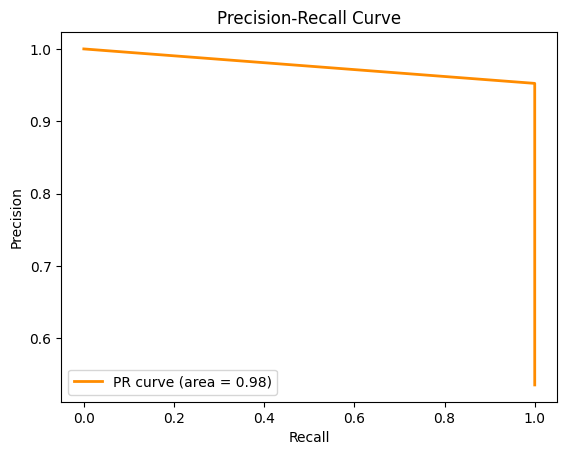

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_true, y_pred_binary_1d)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()





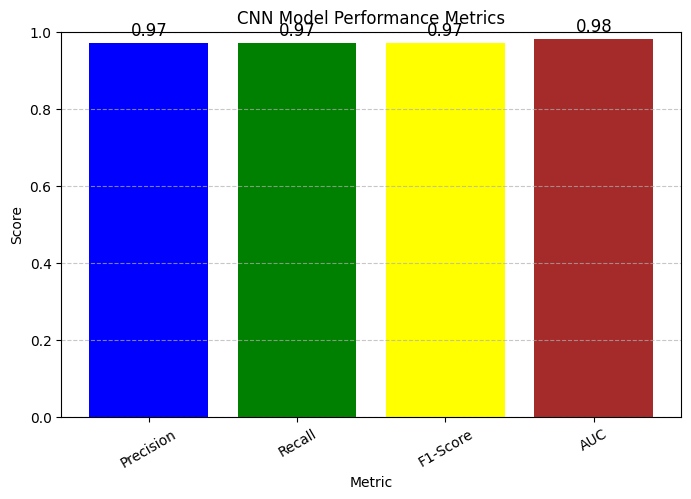

In [61]:
import matplotlib.pyplot as plt

# Example results dictionary (replace with your actual metrics)
results = {
    'Precision': 0.97, 
    'Recall': 0.97, 
    'F1-Score': 0.97,
    'AUC' : 0.98
}

# Create the bar graph
plt.figure(figsize=(8, 5))
bars = plt.bar(results.keys(), results.values(), color=['blue', 'green', 'yellow','brown' ])

# Add labels
plt.xticks(rotation=30)
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("CNN Model Performance Metrics")
plt.ylim(0, 1)  # Scale from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the values on top of bars with adjusted position
for i, v in enumerate(results.values()):
    # Dynamically adjust the position based on bar height
    plt.text(i, v + 0.02, str(round(v, 3)), ha='center', fontsize=12)

# Show plot
plt.show()


In [52]:
def predict(model, img): 
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis = 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence 

Batch size: 32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


ValueError: num must be an integer with 1 <= num <= 9, not 10

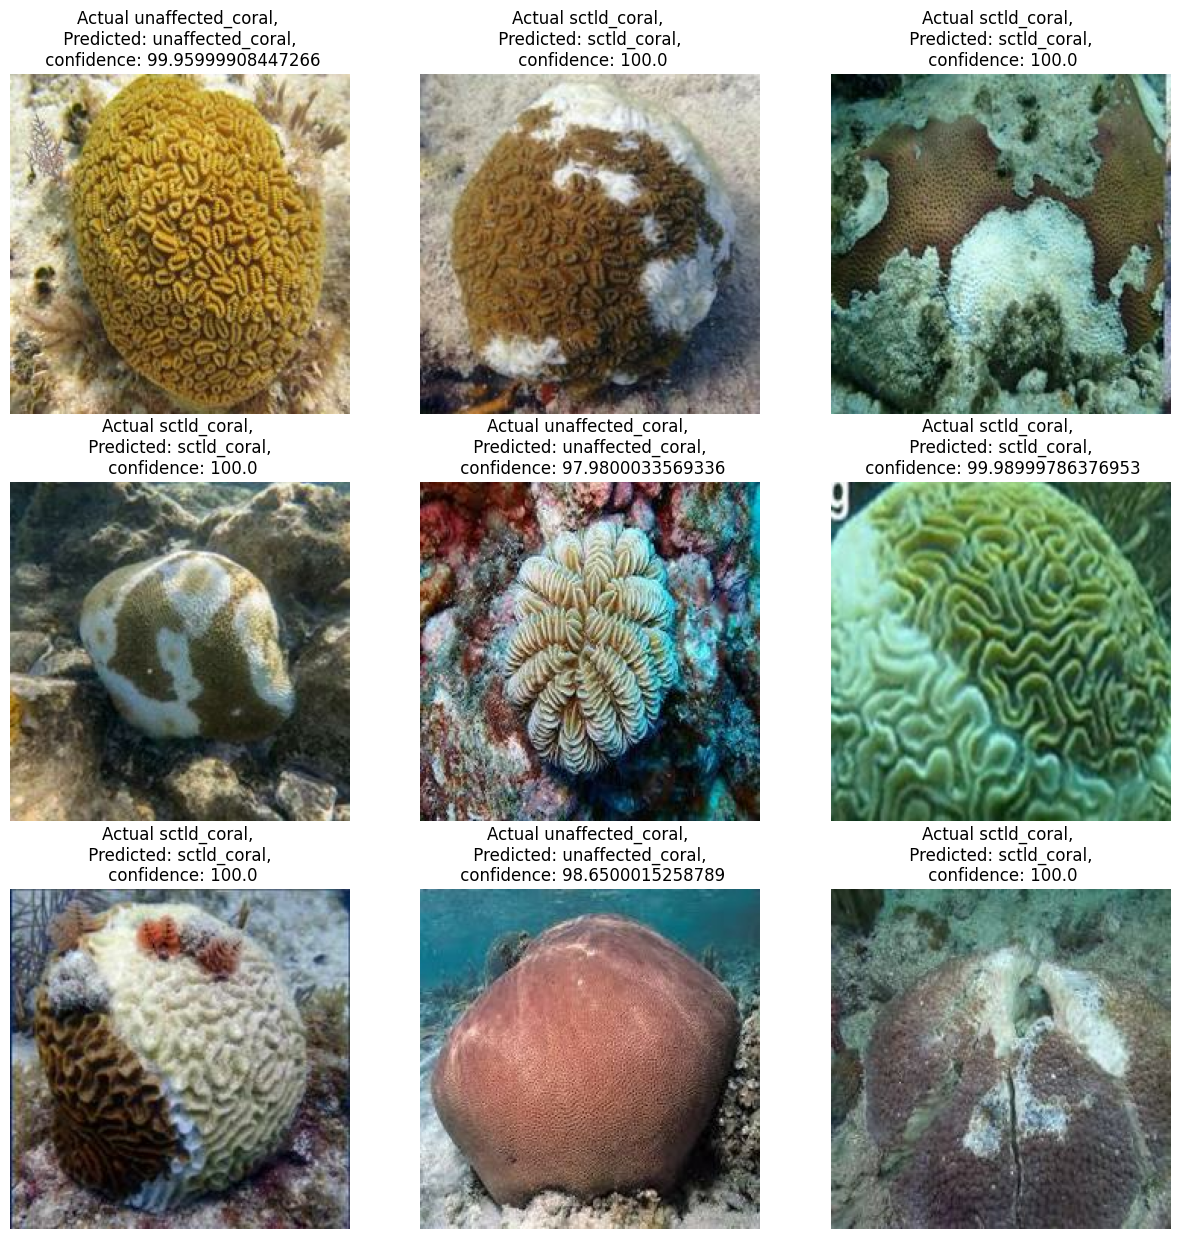

In [53]:
def predict(model, img): 
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, axis = 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence 
plt.figure(figsize = (15, 15))
for images, labels in test_ds.take(1):
    batch_size = images.shape[0]
    print(f"Batch size: {batch_size}")
   # plt.imshow(images.numpy().astype("uint8"))
    for i in range(32):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual {actual_class}, \n Predicted: {predicted_class}, \n confidence: {confidence}")
        plt.axis("off")
        

In [74]:
model.export(f"../models/new_models/1_ver/{model_version}")

INFO:tensorflow:Assets written to: ../models/new_models/1_ver/1\assets


INFO:tensorflow:Assets written to: ../models/new_models/1_ver/1\assets


Saved artifact at '../models/new_models/1_ver/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  2264266960784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2264266958672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2264291602320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2264291591952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2264291590800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2264291594640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2264291602896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2264291604432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2264291604240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2264291605008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2264291603088: TensorS

In [42]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 514,184 (1.96 MB)

 Trainable params: 171,394 (669.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 342,790 (1.31 MB)

In [39]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df.to_csv('../../../models/history/1_model_training_history.csv', index=False)

In [48]:
model.save(f"../../../models/1.keras")

SyntaxError: invalid syntax (86520162.py, line 1)